# Project 2, due Dec the 2nd, 11:59pm

Rules

1) submit your .ipynb file by email, titled "CMP SC ECE: 4001-7001: Project 2: XXX", where XXX is your name.

2) your file should be named Project2_XXX.ipynb, where XXX is your name.

3) clear all cells before submitting.

You can use 

1) our class notes (PPTs)

2) your book

3) any Jupyter pages so far

4) webpages on the internet (e.g., Wikipedia)

You CANNOT 

1) work with anyone else (e.g., someone in the class, on the intenet, robot, etc.)

NO late submissions will be accepted.

# Data Set

Refer to https://faculty.eng.ufl.edu/machine-learning/2017/03/classification-label-map-for-muufl-gulfport-released/, or more specifically, https://github.com/GatorSense/MUUFLGulfport. 
    
The MUUFL Gulfport data set was collected in November 2010 over the campus of the University of Southern Mississippi-Gulfpark, located in Long Beach, Mississippi. The data contains co-registered hyperspectral and LiDAR data with a ground sample distance of 1m. The classification label map was generated manually using careful review of and manual interaction with the hyperspectral and lidar data sets, aerial imagery over the scene, photographs taken on the ground of the scene and map data. See the tech report at https://github.com/GatorSense/MUUFLGulfport/blob/master/MUUFLGulfportDataCollection/MUUFLGulfportTechReport.pdf

Note, I already placed "muufl_gulfport_campus_w_lidar_1.mat" on the server at "/dsa/Data/". If you want other files uploaded, just ask, happy to do the such.

Below is code to load the data

In [1]:
import scipy.io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# load the file
mat = scipy.io.loadmat('/dsa/Data/muufl_gulfport_campus_w_lidar_1.mat', squeeze_me=True, struct_as_record=False)
# load the lidar data
LidarData = mat['hsi'].Lidar[0].z[:,:,0]
# load the rgb data
RGBData = mat['hsi'].RGB
# load the HSI data
HSIData = mat['hsi'].Data
print("HSI Dim (x,y,bands)")
print(HSIData.shape)
# load the wavelength info
Wavelengths = mat['hsi'].info.wavelength
WhichFreqs = Wavelengths.copy() * 0.001;
print("Wavelengths")
print(Wavelengths)
# you can look in hsi.groundTruth for more info!

# plot the DEM
fig = plt.figure()
fig.set_size_inches(10,10)
imshow(LidarData, cmap="seismic")
plt.colorbar()
plt.show()

# plot the RGB
fig = plt.figure()
fig.set_size_inches(8,8)
plt.imshow(RGBData)
plt.show()

# plot a few HSI samples
plt.plot(HSIData[149,49,:],'r')
plt.plot(HSIData[299,249,:],'b')
plt.plot(HSIData[49,49,:],'g')
plt.show()


HSI Dim (x,y,bands)
(325, 337, 72)
Wavelengths
[ 367.700012  377.299988  386.799988  396.299988  405.799988  415.399994
  424.899994  434.399994  443.899994  453.5       463.        472.5
  482.        491.5       501.        510.600006  520.099976  529.599976
  539.099976  548.599976  558.099976  567.599976  577.200012  586.700012
  596.200012  605.700012  615.200012  624.700012  634.200012  643.799988
  653.299988  662.799988  672.299988  681.799988  691.299988  700.799988
  710.299988  719.799988  729.400024  738.900024  748.400024  757.900024
  767.400024  776.900024  786.400024  795.900024  805.5       815.
  824.5       834.        843.5       853.        862.5       872.099976
  881.599976  891.099976  900.599976  910.099976  919.599976  929.200012
  938.700012  948.200012  957.700012  967.200012  976.799988  986.299988
  995.799988 1005.299988 1014.799988 1024.400024 1033.900024 1043.400024]


<Figure size 1000x1000 with 2 Axes>

<Figure size 800x800 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# Task 1 (everyone)

Write a one to two page detailed summarization of the data collection. You can refer to https://github.com/GatorSense/MUUFLGulfport/blob/master/MUUFLGulfportDataCollection/MUUFLGulfportTechReport.pdf. 

	The researchers chose to collect the data at the University of Southern Mississippi – Gulfport. This site featured a wide variety of features as well as natural (grass, trees, etc.) and human (pillars, cars, etc.) created targets for identification. The Live Oaks on the campus also provided varying tree canopy cover. This allowed the researchers to place identical target in different canopy cover conditions to test detection when the target has different lighting conditions and is partially obscured by tree cover. The researchers constructed 64 targets for this data collection. 60 of the targets were designed for evaluating endmember detection, pixel unmixing, and target detection techniques. Of the 60, there were three different size groups (20 of each) and they were placed in varying tree cover and varying heights off the ground. The remaining 4 targets were designed to be atmospheric modeling targets. These targets were placed at ground level and not obscured by any trees and were made of 100% cotton fabric to determine the radiometric calibration of the camera from the known samples of the fabric. 
	The researchers took ground spectral measurements of ground features and the 4 Atmospheric Modeling cloths using two separate spectrometers. The cameras were mounted on a small propeller plane that flew out of Stennis Airport in Kiln, Mississippi between November 6-8,2010. They performed 5 collection flights at different altitudes over the site at around solar noon. The LIDAR information was then processed by a third party and the GPS ground control points were used to ensure that the vertical fit of the LIDAR data was accurate. They collected spectrometry data of the tarps in a lab and then compared them to the measurements collected in the field. Using this data, they estimated the true reflection values from the hyperspectral data. Researchers than assigned a ground truth to the image. They created a program to align the aerial and ground GPS measurements.  


# Task 2 (everyone)

Write code to find me buildings

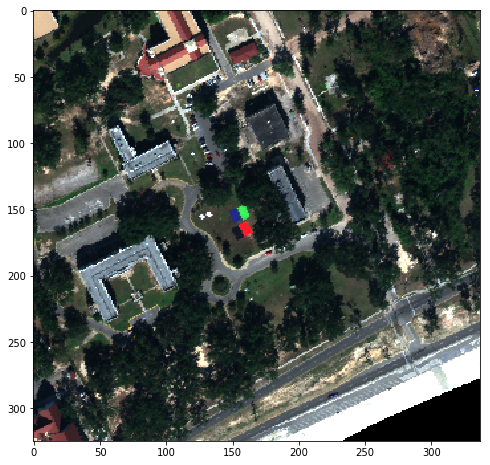

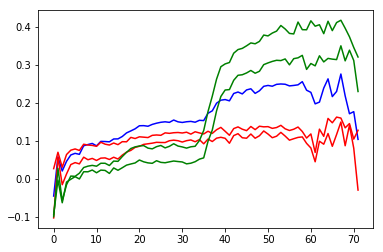

In [2]:
# Zero mean and unit area
def normalize(sig):
    aval = np.sum( sig )
    sig = sig / aval
    smean = np.mean(sig)
    sig = sig - smean
    sig = sig*1000
    return(sig)

# plot the RGB
fig = plt.figure()
fig.set_size_inches(8,8)
plt.imshow(RGBData)
plt.show()


# HSIData = normalize(HSIData)
# Building
# plt.plot(HSIData[50,200,:],'r')
# plt.plot(HSIData[120,25,:],'b')
#Building
plt.plot(HSIData[175,100,:],'b')

plt.plot(HSIData[250,315,:],'r')
plt.plot(HSIData[210,325,:],'r')

plt.plot(HSIData[250,100,:],'g')
plt.plot(HSIData[25,330,:],'g')
# plt.plot(HSIData[100,300,:],'g')
plt.show()

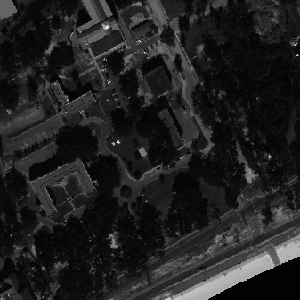

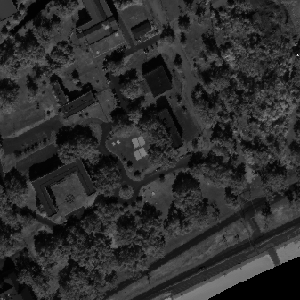

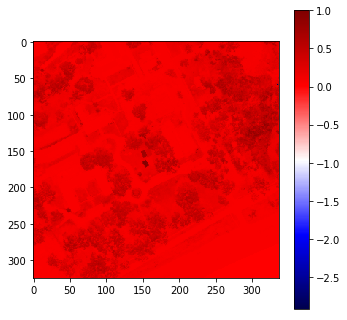

In [3]:
#NDVI Calc
VISindsL = np.where( WhichFreqs > 0.58 , 1, 0 )
VISindsU = np.where( WhichFreqs < 0.68 , 1, 0 )
VISinds = VISindsL * VISindsU
# print(VISinds)
NIRindsL = np.where( WhichFreqs > 0.725 , 1, 0 )
NIRindsU = np.where( WhichFreqs < 1 , 1, 0 )
NIRinds = NIRindsL * NIRindsU

data = HSIData.copy()
data = data/100
# print(NIRinds)
Xdim, Ydim, Bands = data.shape
VISimage = np.zeros(shape=(Xdim,Ydim))
for i in range(Xdim):
    for j in range(Ydim):  
        Sample = data[i,j,:]
        SamplVIS = np.multiply(Sample,VISinds)
        VISimage[i,j] = np.sum( SamplVIS )

# display it
m_val = np.amax(VISimage)
N_img = VISimage / m_val
im = Image.fromarray(np.uint8(N_img*255))     
display(im.resize((300,300),Image.NEAREST))

NIRimage = np.zeros(shape=(Xdim,Ydim))
for i in range(Xdim):
    for j in range(Ydim):  
        Sample = data[i,j,:]
        SamplNIR = np.multiply(Sample,NIRinds)
        NIRimage[i,j] = np.sum( SamplNIR )

# display it
m_val = np.amax(NIRimage)
N_img = NIRimage / m_val
im = Image.fromarray(np.uint8(N_img*255))     
display(im.resize((300,300),Image.NEAREST))

TOP = np.subtract( NIRimage, VISimage )
BOTTOM = np.add( NIRimage, VISimage )
DIV = np.divide( NIRimage, VISimage )

# display it
m_val = np.amax(DIV)
N_img = DIV / m_val
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(5.5,5.5),facecolor='w');
plt.imshow(N_img,cmap="seismic");
plt.colorbar();

In [4]:
def removeNoise(matrix, wSize,percentPos):
    for x in range(0, Xdim ):
        for y in range(0, Ydim):
            tempMatrix = matrix[x-wSize:x+wSize,y-wSize:y+wSize] 
            positives = (tempMatrix == 1).sum()
            tempPercPos = positives/subSize
#         print(tempPercPos)
            if (tempPercPos < percentPos):
                matrix[x,y] = 0
    return matrix
def overlayRGB(RGBImage,data):
    Xdim,Ydim = RGBImage[:,:,1].shape
    for x in range(0, Xdim ):
        for y in range(0, Ydim):
            if(data[x,y] == 1):
                RGBImage[x,y,0] = 1
                RGBImage[x,y,1:2] = 0        
    # plot the RGB
    plotData(RGBImage)

def plotData(data):
    fig = plt.figure()
    fig.set_size_inches(10,10)
    imshow(data)
    plt.show()


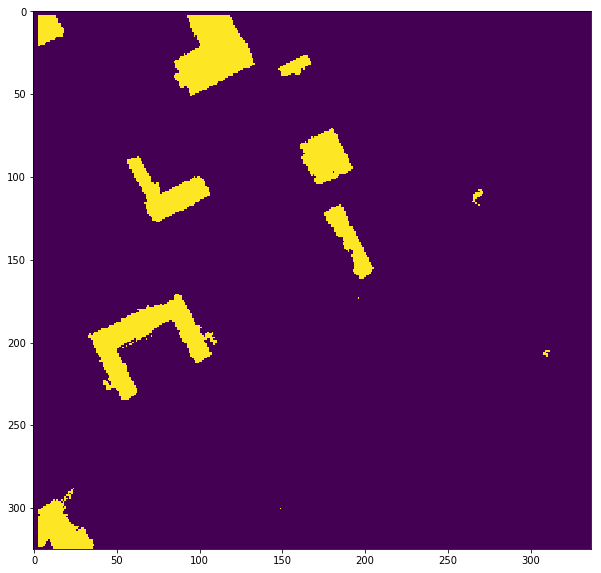

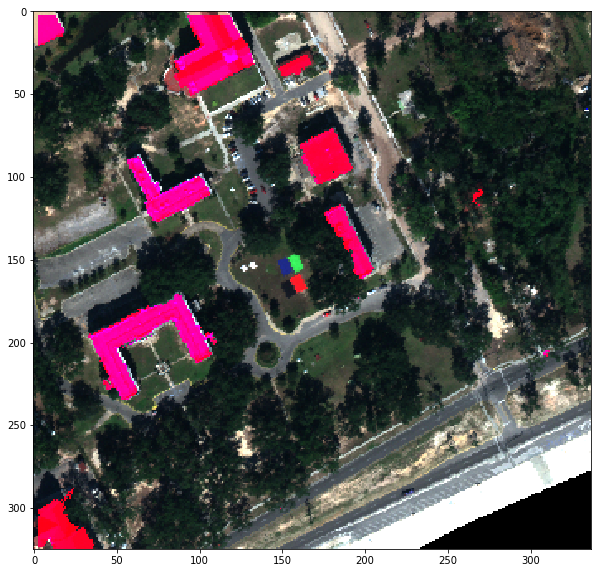

In [5]:
demThreshold = np.where(LidarData > 10, 1, 0)

sig = normalize(HSIData[:,:,30])

hsiThreshold = np.where(HSIData[:,:,25] > .05, 1,0)
hsiThreshold2 = np.where(HSIData[:,:,45] > .225 ,0,1)

ndviThreshold = np.where(N_img[:,:]> 0.095, 0,1)


# combinedThreshold = demThreshold + hsiThreshold + hsiThreshold2
combinedThreshold = demThreshold + ndviThreshold
buildings = np.where(combinedThreshold == 2, 1,0)


wSize = 3
subSize = wSize*wSize
percentPos = .8
Xdim,Ydim = buildings.shape
buildings = removeNoise(buildings,wSize,percentPos)

RGBImage = RGBData.copy()


# plotData(ndviThreshold)

plotData(buildings)

overlayRGB(RGBImage,buildings)

# Task 3 (everyone)

Write code to find me (1) trees, (2) bushes, and (3) grass

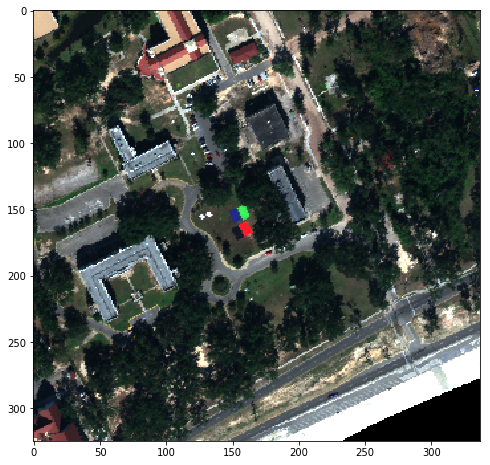

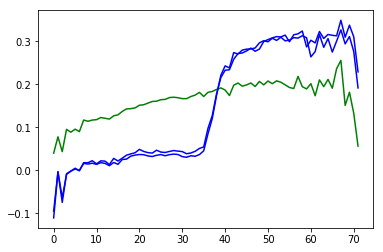

In [6]:
# plot the RGB
fig = plt.figure()
fig.set_size_inches(8,8)
plt.imshow(RGBData)
plt.show()


# HSIData = normalize(HSIData)
# Building
# plt.plot(HSIData[50,200,:],'r')
# plt.plot(HSIData[120,25,:],'b')
#Building
plt.plot(HSIData[175,210,:],'g')

plt.plot(HSIData[250,100,:],'b')
plt.plot(HSIData[210,225,:],'b')

# plt.plot(HSIData[250,100,:],'g')
# plt.plot(HSIData[25,330,:],'g')
# plt.plot(HSIData[100,300,:],'g')
plt.show()

Bushes


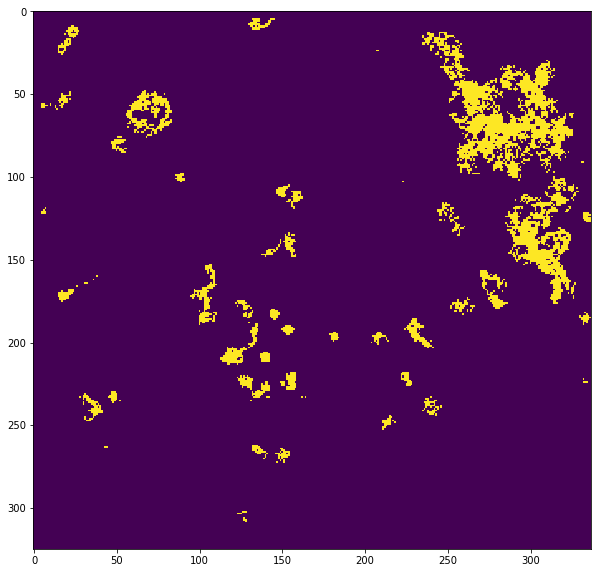

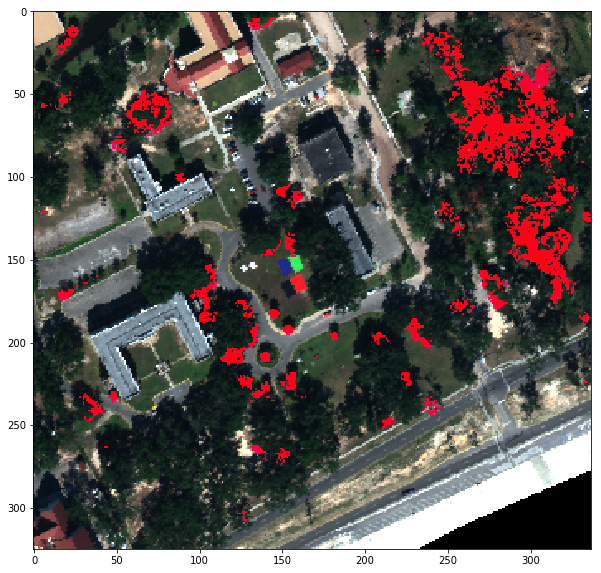

In [7]:
print("Bushes")
#Grass is on the ground
demThreshold = np.where(LidarData < 11, 1, 0)
demThreshold2 = np.where(LidarData > 7, 1, 0)
#Spectral filtering for bushes
hsiThreshold = np.where(HSIData[:,:,10] < .09, 1,0)
hsiThreshold2 = np.where(HSIData[:,:,50] > .25, 1,0)
ndviThreshold = np.where(N_img[:,:]> 0.095, 1,0)

combinedThreshold = demThreshold + demThreshold2 + ndviThreshold 
bushes = np.where(combinedThreshold == 3, 1,0)


wSize = 5
subSize = wSize*wSize
percentPos = .8
Xdim,Ydim = bushes.shape
bushes = removeNoise(bushes,wSize,percentPos)
RGBImage = RGBData.copy()
                
# plotData(ndviThreshold)
plotData(bushes)

overlayRGB(RGBImage,bushes)

Trees


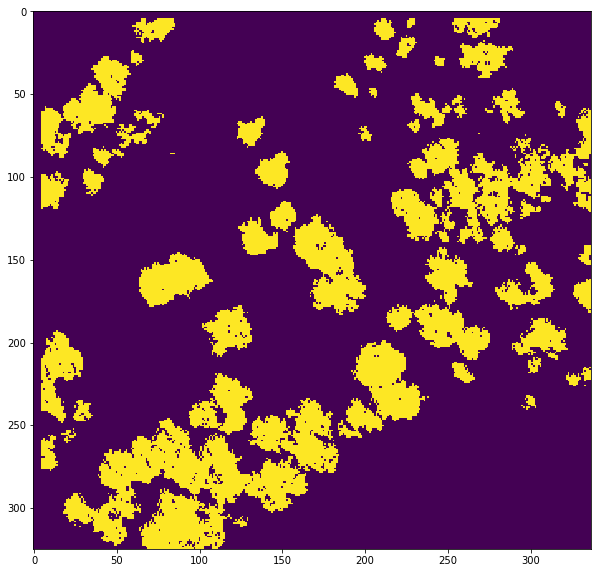

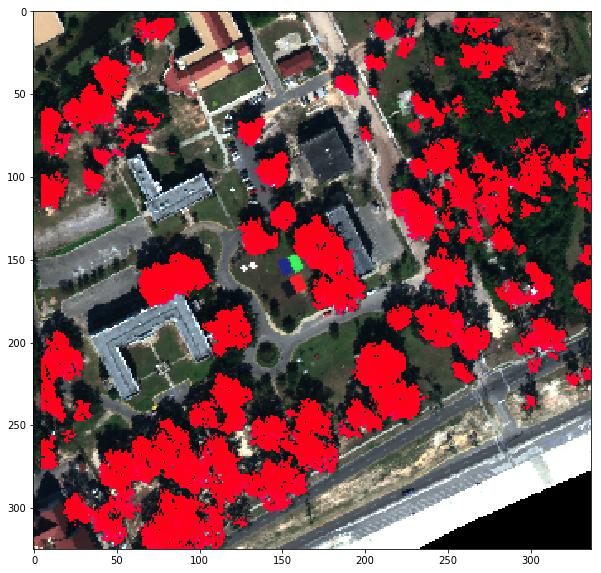

In [8]:
print("Trees")
#Grass is on the ground
demThreshold = np.where(LidarData > 12, 1, 0)
#Spectral filtering for trees
hsiThreshold = np.where(HSIData[:,:,10] < .09, 1,0)
hsiThreshold2 = np.where(HSIData[:,:,50] > .25, 1,0)
ndviThreshold = np.where(N_img[:,:]> 0.095, 1,0)

combinedThreshold = demThreshold + ndviThreshold
trees = np.where(combinedThreshold == 2, 1,0)


wSize = 5
subSize = wSize*wSize
percentPos = .8
Xdim,Ydim = trees.shape
trees = removeNoise(trees,wSize,percentPos)
RGBImage = RGBData.copy()
                
# plotData(demThreshold)
plotData(trees)

overlayRGB(RGBImage,trees)


Grass


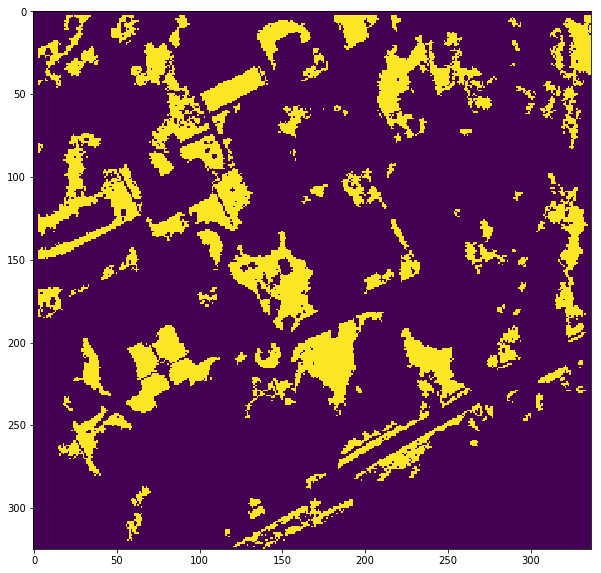

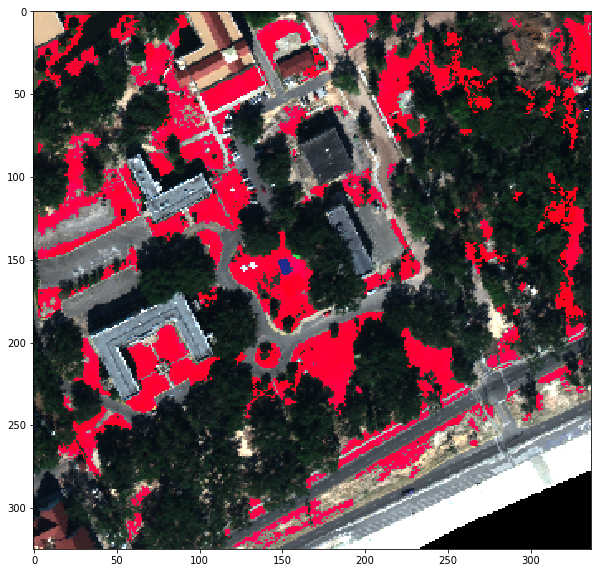

In [9]:
print("Grass")
#Grass is on the ground
demThreshold = np.where(LidarData < 8, 1, 0)
#Spectral filtering for sand
hsiThreshold = np.where(HSIData[:,:,10] < .09, 1,0)
hsiThreshold2 = np.where(HSIData[:,:,50] > .25, 1,0)

combinedThreshold = demThreshold + hsiThreshold + hsiThreshold2 
grass = np.where(combinedThreshold == 3, 1,0)


wSize = 3
subSize = wSize*wSize
percentPos = .8
Xdim,Ydim = grass.shape
grass = removeNoise(grass,wSize,percentPos)

                
# plotData(hsiThreshold2)
plotData(grass)

RGBImage = RGBData.copy()
overlayRGB(RGBImage,grass)


# Task 4 (everyone)

Write code to find me sand

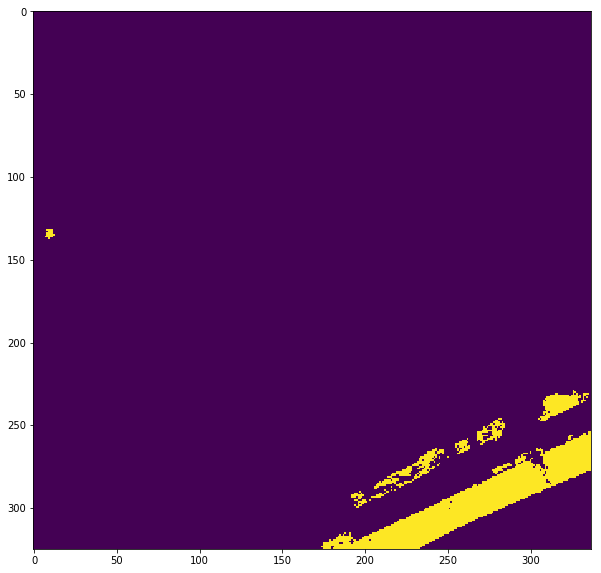

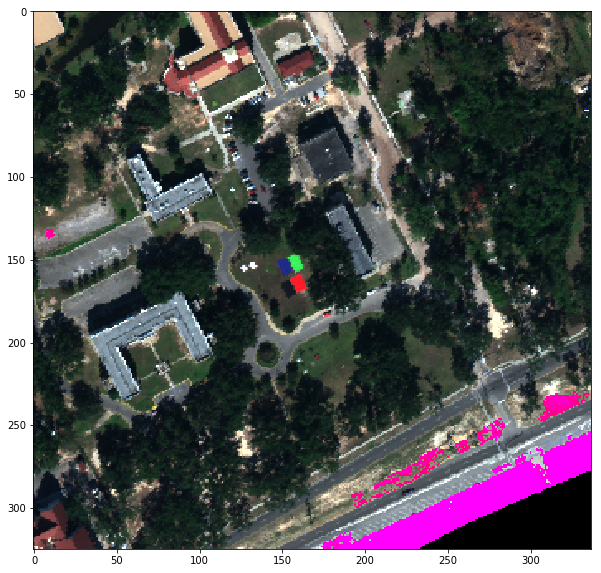

In [10]:
#Sand is on the ground
demThreshold = np.where(LidarData < 4, 1, 0)
#Spectral filtering for sand
hsiThreshold = np.where(HSIData[:,:,45] < .3, 0,1)
ndviThreshold = np.where(N_img[:,:]> 0.095, 0,1)

combinedThreshold = demThreshold + ndviThreshold + hsiThreshold
sand = np.where(combinedThreshold == 3, 1,0)


wSize = 5
subSize = wSize*wSize
percentPos = .8
Xdim,Ydim = sand.shape
sand = removeNoise(sand,wSize,percentPos)
        

# plotData(ndviThreshold)
plotData(sand)
RGBImage = RGBData.copy()
# plotData(RGBImage)
overlayRGB(RGBImage,sand)

# Task 5 (graduates, do 2 of 3)

Write code to find as many of the emplaced targets in the scene that you can

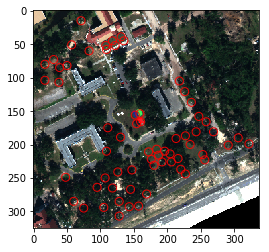

In [11]:
from matplotlib.patches import Circle

# load the target row and col inds
RowInds = mat['hsi'].groundTruth.Targets_rowIndices
ColInds = mat['hsi'].groundTruth.Targets_colIndices

# show them
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
plt.imshow(RGBData)
for i in range(RowInds.size):
    circ = Circle((ColInds[i],RowInds[i]),6,alpha=0.9,color='red',fill=0)
    ax.add_patch(circ)
plt.show()

# Task 6 (graduates, do 2 of 3)

Write code to find me cars in the scene

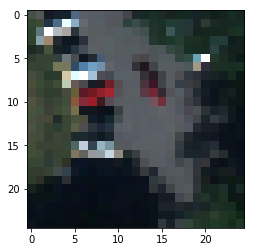

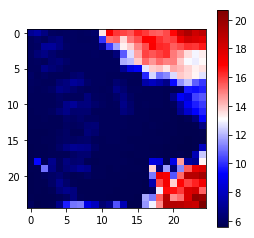

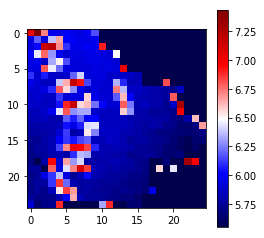

In [12]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np

# plot the RGB
fig = plt.figure()
fig.set_size_inches(4,4)
RGBDataCars = np.copy( RGBData[100:125,125:150] )
plt.imshow(RGBDataCars)
plt.show()

# plot the DEM
LidarDataCars = np.copy( LidarData[100:125,125:150] )
fig = plt.figure()
fig.set_size_inches(4,4)
imshow(LidarDataCars, cmap="seismic")
plt.colorbar()
plt.show()

# throw out high values so we can see what cars look like
R,C = LidarDataCars.shape
for i in range(R):
    for j in range(C):
        if( LidarDataCars[i,j] > 7.5 ):
            LidarDataCars[i,j] = np.amin(LidarDataCars)

# plot the DEM
fig = plt.figure()
fig.set_size_inches(4,4)
imshow(LidarDataCars, cmap="seismic")
plt.colorbar()
plt.show()

# Task 7 (graduates, do 2 of 3)

Make a "material library" and peform land classification; e.g., vegetation, road, sand, etc. You must have at least 5 materials/classes. The result can be either 

1. Per pixel, a color that indicates its class 

2. Per class, an image that represents its "percentage of"

Example outputs

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925231214011424-gr4.jpg">

<img src="https://www.researchgate.net/profile/Naveed_Akhtar26/publication/319665659/figure/fig5/AS:668389576028170@1536367901361/Classification-maps-for-the-Indian-Pines-image-The-training-and-testing-ground-truth.ppm">

Percentage (or mixture maps) see

1. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6601009&isnumber=4609444&tag=1

2. http://derektanderson.com/pdfs/06203616.pdf